**NAMA :** Erhansa Pratama Aryana

**NIM :** 23.11.5761

**KELAS :** BDDM 5

Link Dataset : https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

# **1. Install dan Import Library**

In [5]:
!pip install kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

Download Dataset dari Kaggle

In [2]:
# Mengatur token Kaggle di Colab
!mkdir ~/.kaggle
!echo '{"username":"your_kaggle_username","key":"your_kaggle_api_key"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset
!unzip diabetes-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 349MB/s]
Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


Load Dataset

In [4]:
file_path = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
data = pd.read_csv(file_path)

# **2. Profil Dataset**

In [6]:
print("Dataset Overview:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  M

Visualize Label Distribution

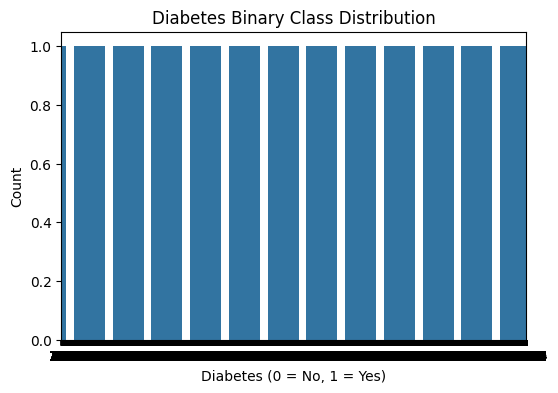

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data['Diabetes_binary'])
plt.title("Diabetes Binary Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# **3. DATA PREPROCESSING**

In [8]:
# Check Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Define Features and Target Variable
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing Values:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# **4. EXPLORATORY DATA ANALYSIS**

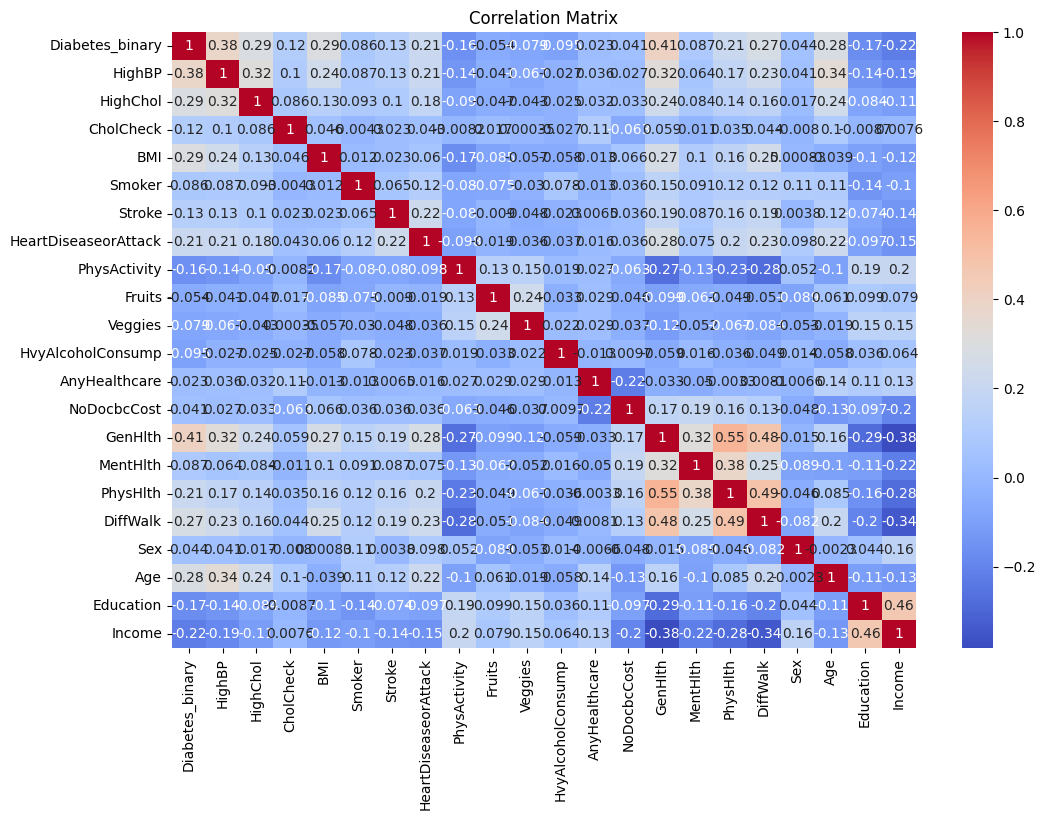

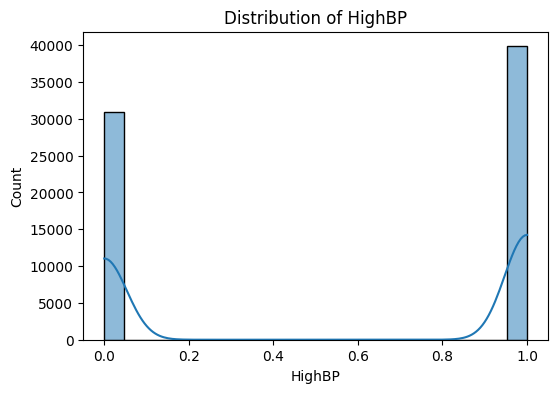

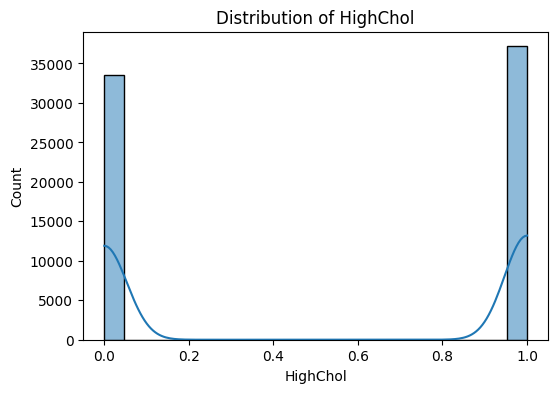

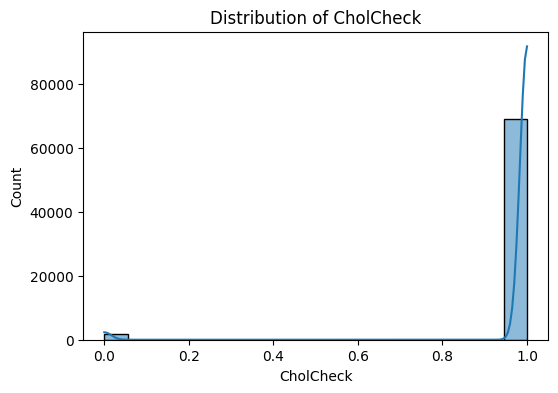

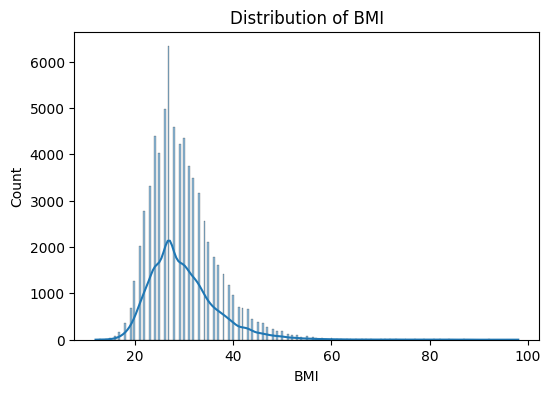

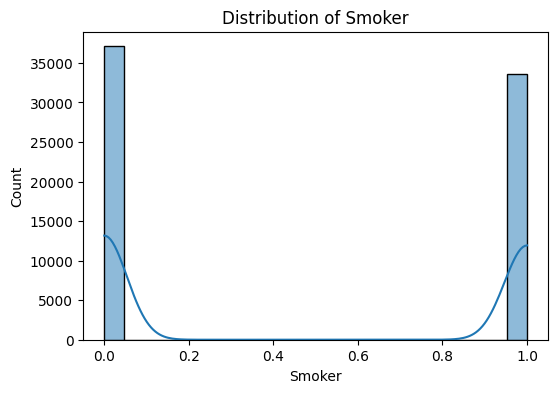

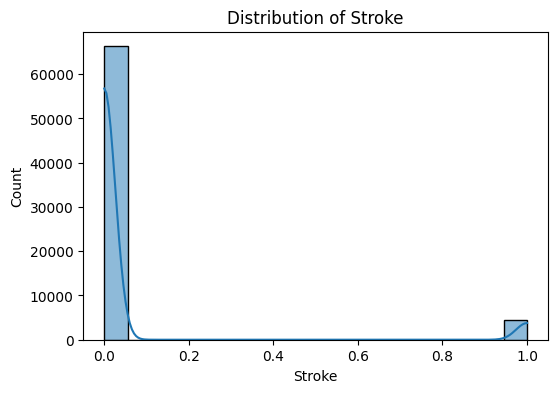

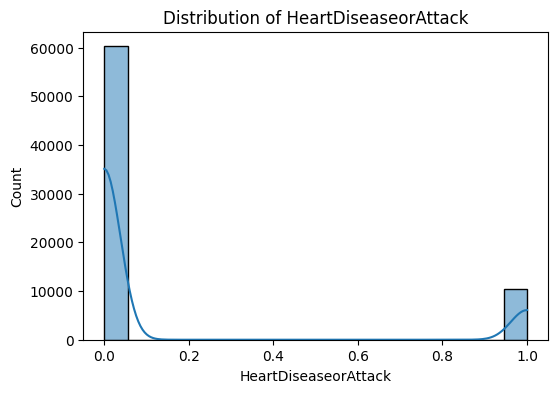

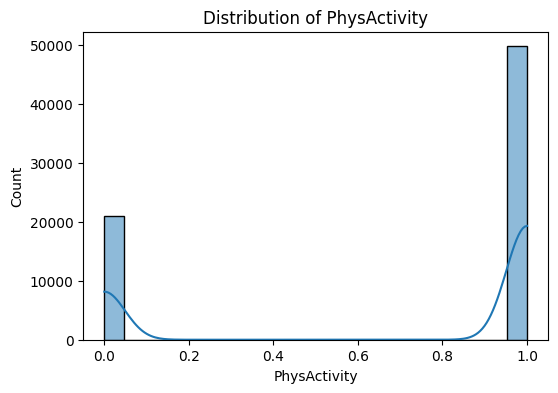

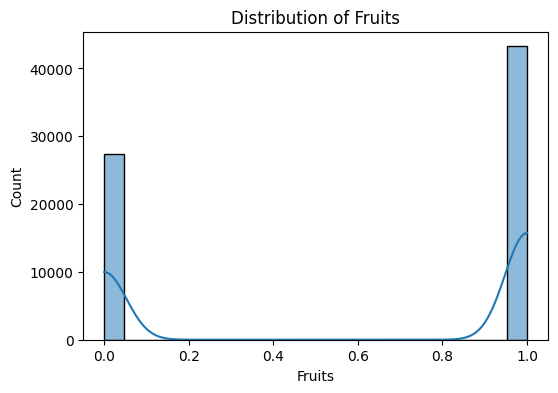

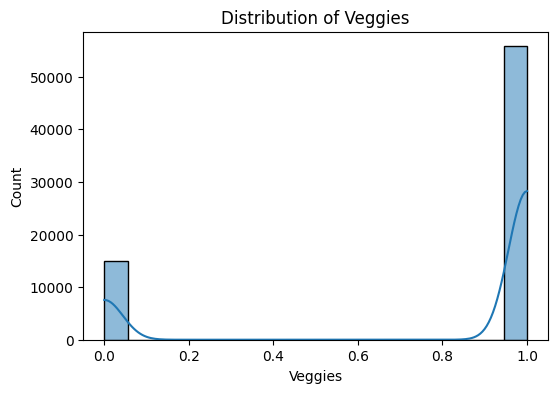

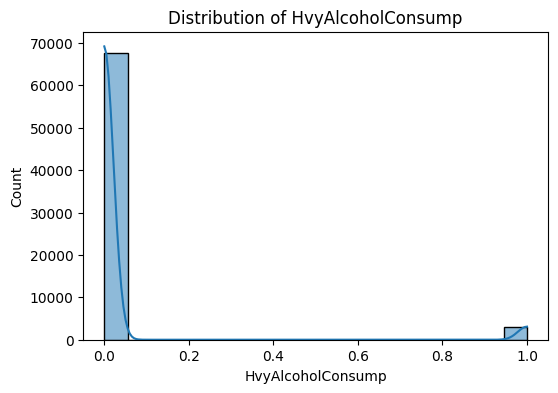

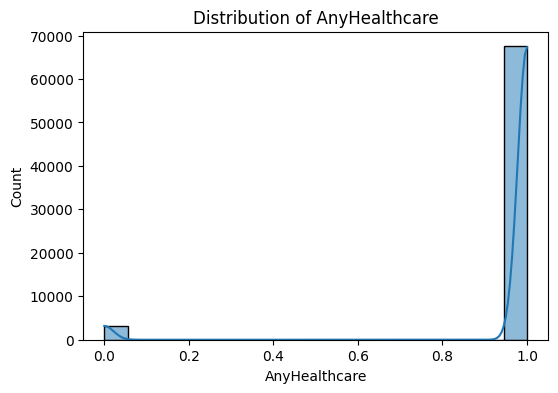

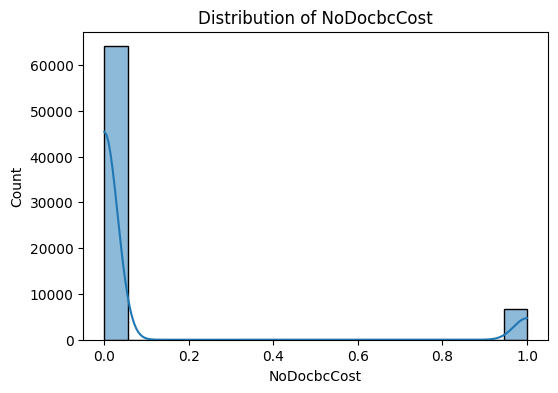

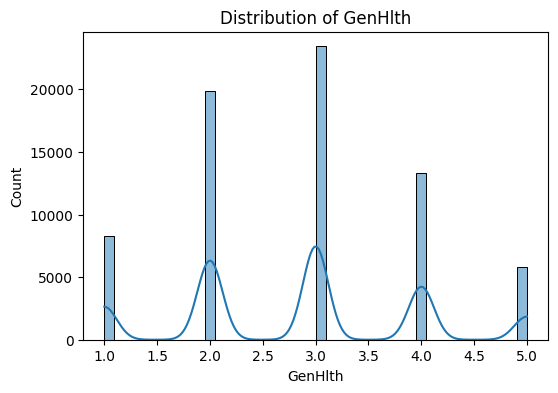

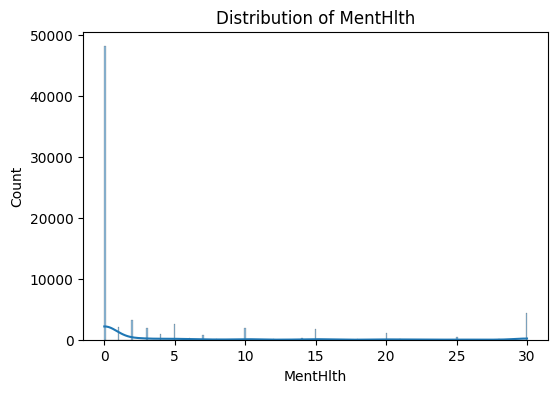

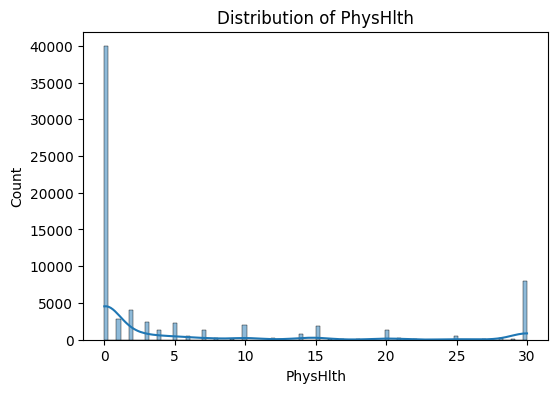

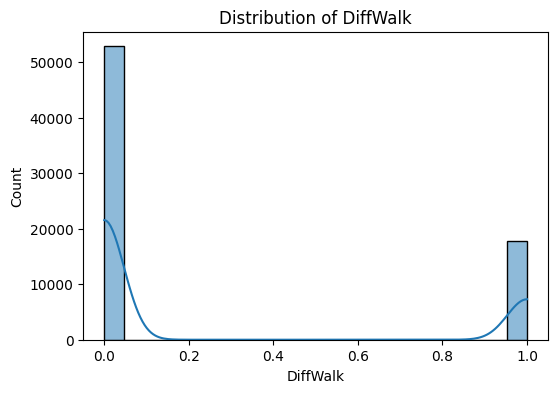

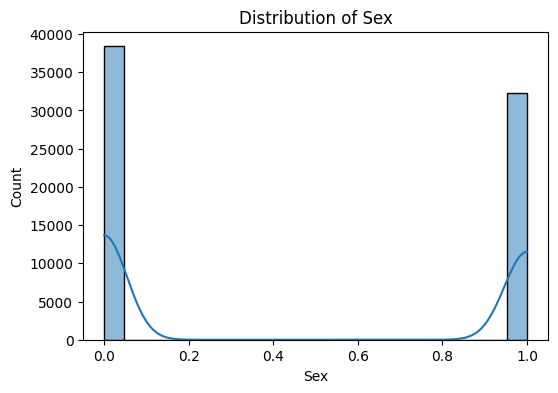

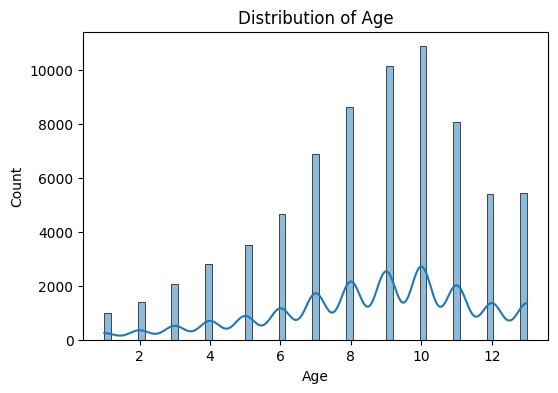

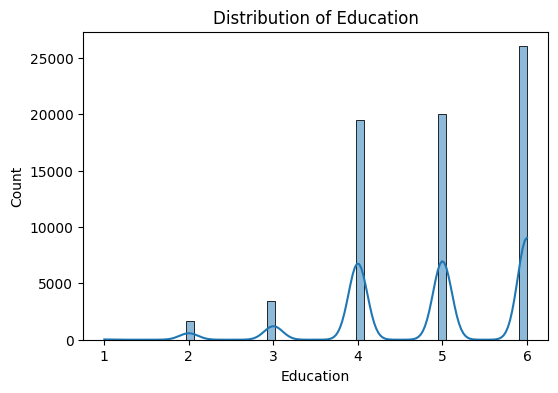

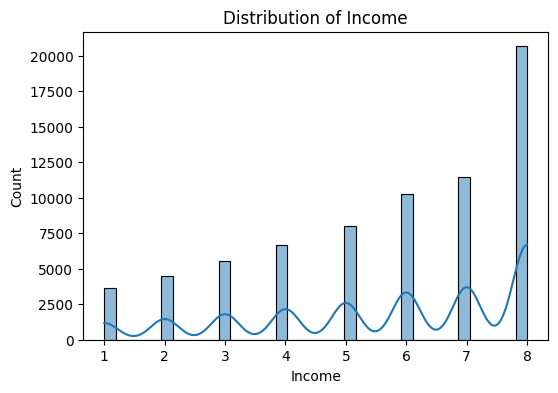

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Feature Distributions
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# **5. SELEKSI FITUR**

In [10]:
# Select Top 10 Features Using Chi-Square Test
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


# **6. MODELING**

In [11]:
# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the Model
model.fit(X_train_selected, y_train)

# Save the Model
joblib.dump(model, 'diabetes_model.pkl')
print("Model saved as 'diabetes_model.pkl'")

Model saved as 'diabetes_model.pkl'


# **7. EVALUASI MODEL**

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.71      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



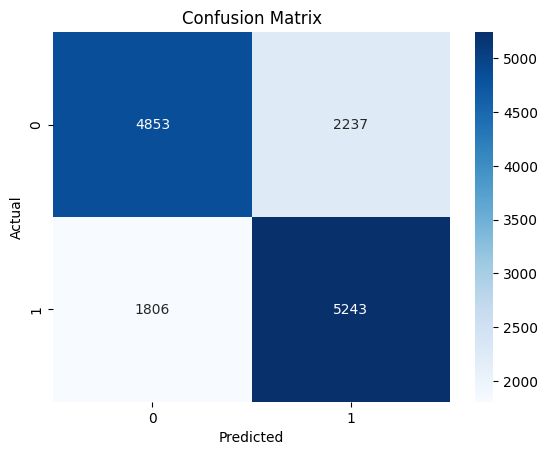

In [12]:
# Make Predictions
y_pred = model.predict(X_test_selected)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()